# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.      

In [479]:
# Importerer nødvendige biblioteker
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [480]:
# Definerer funksjonene invers
def demand(x):
    return (500-x)/3.2

def supply(x,t):
    return ((100+x)/4.3)+ t

In [481]:
# Lager likevektsbetingelsen
x,t=sp.symbols('x, t', real=True, positive=True)
equ=sp.Eq(demand(x),supply(x,0))
equ

Eq(156.25 - 0.3125*x, 0.232558139534884*x + 23.2558139534884)

In [482]:
x_eq=sp.solve(equ,x)
x_eq=float(x_eq[0])
x_eq

243.99999999999997

In [483]:
p_eq =demand(x_eq)
p_eq

80.0

2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.     

In [484]:

producer_surplus=sp.integrate(p_eq-supply(x,0),(x,0,x_eq))
producer_surplus

6922.79069767442

In [485]:
consumer_surplus=sp.integrate(demand(x)-p_eq,(x,0,x_eq))
consumer_surplus

9302.50000000000

In [486]:
tax_revenue=sp.integrate(supply(x,t)-supply(x,0),(x,0,x_eq))
# Ikke sikker på hvorfor denne ble slik
tax_revenue

244.0*t

3. Tegn likevekten for $t=0$ og fargelegg KO og PO.     

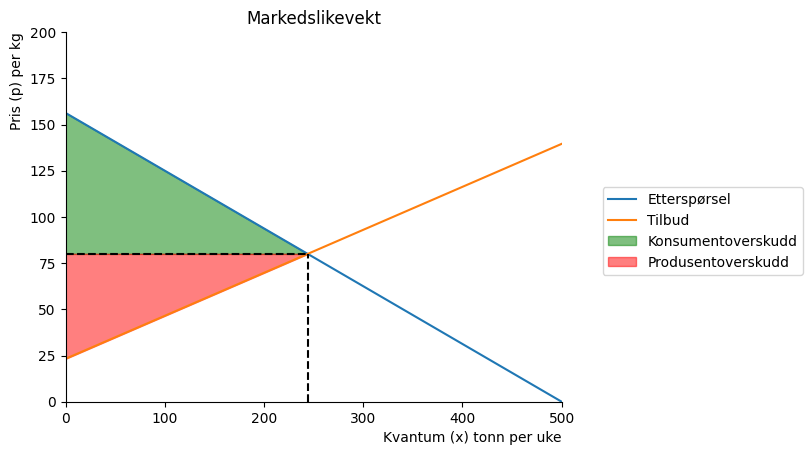

In [487]:
x_n=np.linspace(0.1,500,100)
q= np.linspace(0,x_eq,100)
#lager en akse

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p) per kg', loc='top')
                ax.set_xlabel('Kvantum (x) tonn per uke', loc='right')
                ax.set(xlim=(0,500))
                ax.set(ylim=(0,200))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plotter likevekten for t=0

ax.plot (x_n, demand(x_n), label='Etterspørsel')
ax.plot (x_n, supply(x_n,0), label='Tilbud')

# make line for equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black')
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black')

# tittel
ax.set_title('Markedslikevekt')

ax.fill_between(q,p_eq,demand(q), color = 'green',alpha = 0.5,label='Konsumentoverskudd')
ax.fill_between(q,supply(q, 0),p_eq, color = 'red',alpha = 0.5,label='Produsentoverskudd')

#vis navnene:
ax.legend(bbox_to_anchor=(1.5,0.6));

4. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      

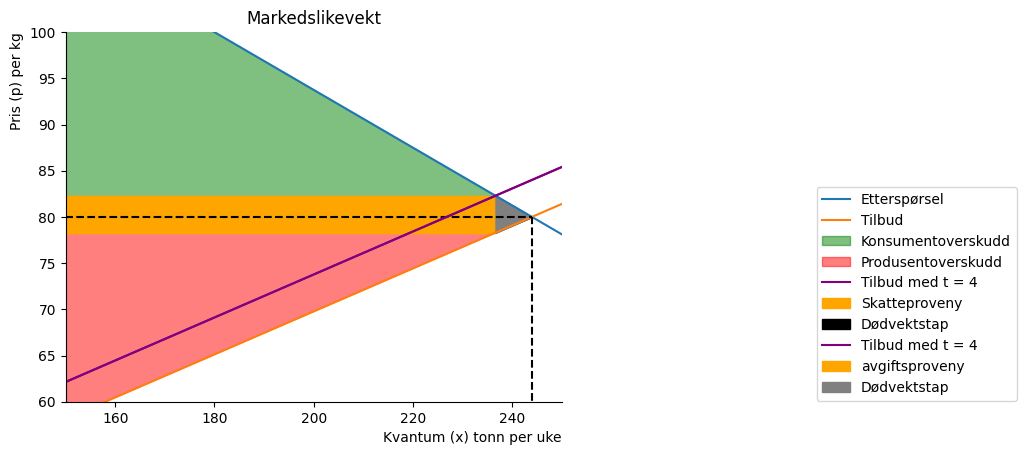

In [498]:
# likevekt for t=4
equ_t4 = sp.Eq(demand(x),supply(x, 4))
# løser likningen for x
x_eq_t4 = sp.solve(equ_t4,x)
# konverterer til float
x_eq_t4 = float(x_eq_t4[0])
# finner likevektsprisen
p_eq_t4=demand(x_eq_t4)
# finner dødvektstapet
q2 = np.linspace(0,x_eq_t4,100)
# finner avgiftsproveny
q3 = np.linspace(x_eq,x_eq_t4,100)


# definerer aksene litt nærmere likevekten
ax.set(xlim=(150,250))
ax.set(ylim=(60,100))
# plotter likevekten for t=4
ax.plot (x_n, supply(x_n,4), color="purple", label='Tilbud med t = 4')
# fyller inn avgiftsproveny
ax.fill_between(q2,p_eq_t4,p_eq_t4-4, color = 'orange',label='avgiftsproveny')
# fyller inn dødvektstap
ax.fill_between(q3,supply(q3, 0),demand(q3), color = 'grey',label='Dødvektstap')         
# viser legende                                                             
ax.legend(bbox_to_anchor=(1.5,0.6));
fig

5. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

In [497]:
from IPython.display import Markdown
#producer surplus without tax
prod_surplus_t0 = sp.integrate(p_eq-supply(x, 0),(x,0,x_eq))
#konsumer surplus without tax
cons_surplus_t0 =sp.integrate(demand(x)-p_eq,(x,0,x_eq))
#production surplus with t=4
prod_surplus_t4 = sp.integrate(p_eq_t4 - 4 - supply(x, 0), (x, 0, x_eq_t4)) 
#konsumer surplus with t=4
cons_surplus_t4 = sp.integrate(demand(x)-p_eq_t4, (x, 0, x_eq_t4)) 
#tax proveny with t=4
avgiftsproveny = sp.integrate(4, (x, 0, x_eq_t4))
#deadweight loss
dødvektstap = sp.integrate(demand(x) - supply(x, 0), (x, x_eq_t4, x_eq))

tbl=f"""
|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:      | ${p_eq }$           | ${round(p_eq_t4, 2)}$      | ${round(p_eq_t4 - p_eq, 2)}$   |
| Produsentpris:      | ${p_eq }$           | ${round(p_eq_t4, 2)-4 }$   | ${round(p_eq_t4-4 - p_eq, 2)}$ |
| Kvantum:            | ${round(x_eq, 2)}$  | ${round(x_eq_t4, 2)}$      |  ${round(x_eq_t4 - x_eq, 2)}$  |
| Konsumentoverskudd: | ${round(cons_surplus_t0, 2)}$ |${round(cons_surplus_t4, 2)}$  |  ${round(cons_surplus_t4 - cons_surplus_t0, 2)}$ |
| Produsentoverskudd: | ${round(prod_surplus_t0, 2)}$ | ${round(prod_surplus_t4, 2)}$ |  ${round(prod_surplus_t4 - prod_surplus_t0, 2)}$ |
| KO + PO:            |  ${round(prod_surplus_t0 + cons_surplus_t0, 2)}$    | ${round(prod_surplus_t4 + cons_surplus_t4, 2)}$| ${round((round(prod_surplus_t4 + cons_surplus_t4, 2)) - (round(prod_surplus_t0 + cons_surplus_t0, 2)), 2)}$ |
| Skatteproveny      :| ${0}$                  |${round(avgiftsproveny, 2)}$ | ${round(avgiftsproveny, 2) - 0}$   |
| Dødvektstap:        |${0}$                   | ${round(dødvektstap, 2)}$  | ${round(dødvektstap, 2) - 0}$     |
"""
display(Markdown(tbl))


|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris:      | $80.0$           | $82.29$      | $2.29$   |
| Produsentpris:      | $80.0$           | $78.29$   | $-1.71$ |
| Kvantum:            | $244.0$  | $236.66$      |  $-7.34$  |
| Konsumentoverskudd: | $9302.50$ |$8751.34$  |  $-551.16$ |
| Produsentoverskudd: | $6922.79$ | $6512.63$ |  $-410.16$ |
| KO + PO:            |  $16225.29$    | $15263.97$| $-961.32$ |
| Skatteproveny      :| $0$                  |$946.65$ | $946.65$   |
| Dødvektstap:        |$0$                   | $14.68$  | $14.68$     |
